In [3]:
import time
import random
from pdp_lib import processing as proc
from pdp_lib import util
from GA_lib import GA
from GA_lib import operation
from GA_lib import evaluate
from GA_lib import modify

# Load file (Use realative path), Create distances and duration tables


In [4]:
start_time = time.time()
# use 'relative path' in filename
filename = 'pdp_instances/LiLim/pdp_100/lc107.txt'

numVehicles, loadCapacities, speed, data = proc.load_file(filename)
LOCATIONS = data[0]
demands = data[1]
timeWindows = data[2]
serviceTimes = data[3]
pickupSiblings = data[4]
deliverySiblings = data[5]
requestType = data[6]
REQUESTS = proc.generate_request(pickupSiblings,deliverySiblings,requestType)
DISTANCES = proc.createDistanceTable(LOCATIONS)
DURATIONS = proc.createDurationTable(LOCATIONS, DISTANCES, serviceTimes, speed)


print(" processing time --- %s seconds ---" % (time.time() - start_time))

 processing time --- 0.06500363349914551 seconds ---


# Unoptimized Routes

Unoptimized distances is: 3367.79589042


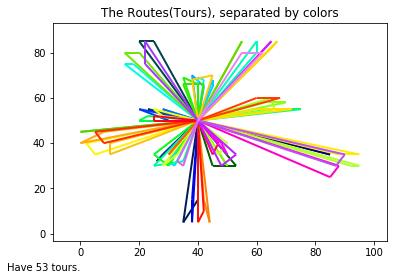

In [5]:
unlimitedVehicles=300
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,unlimitedVehicles,maxSpot=2)
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Unoptimized distances is: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)

# Create a chromosome.

Chromosome initializing time --- 1.9451103210449219 seconds ---
Tour Distances of chromosome: 1687.23532208


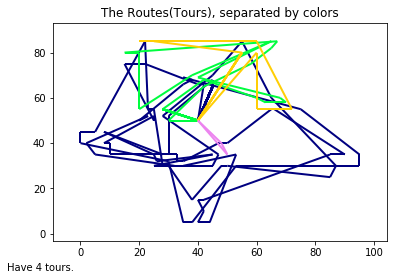

[[0, [35, 8, 30, 33, 32, 27, 25, 26, 20, 19, 15, 23, 18, 38, 36, 46, 22, 14, 16, 41, 17, 4, 12, 40, 21, 42, 31, 1, 37, 28, 24, 29, 45, 5, 6, 13, 39, 0, 52], [3, 7, 13, 17, 18, 24, 25, 33, 32, 31, 43, 42, 41, 67, 63, 87, 86, 76, 78, 81, 104, 55, 57, 54, 56, 53, 74, 40, 44, 35, 37, 27, 29, 10, 8, 11, 82, 71, 70, 73, 77, 72, 58, 60, 46, 38, 39, 101, 36, 14, 28, 26, 48, 45, 59, 64, 61, 103, 80, 79, 88, 100, 106, 2, 22, 66, 68, 51, 69, 50, 52, 34, 49, 47, 105, 21, 1, 75]], [1, [10, 44, 3, 9, 48, 43, 2, 51, 11], [20, 5, 98, 94, 92, 19, 15, 30, 9, 93, 6, 85, 84, 89, 91, 4, 23, 102]], [2, [50, 47, 49, 7], [96, 90, 83, 95, 97, 16, 12, 99]], [3, [34], [65, 62]], [4, [], []], [5, [], []], [6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []]]


In [6]:
start_time = time.time()
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles)
cal_time = time.time() - start_time
print("Chromosome initializing time --- %s seconds ---" % (cal_time))
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Tour Distances of chromosome: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)
print (chromosome)

# Try restricting the 'max spots' to visit not more than 10 spots per vehicle

In [7]:
start_time = time.time()
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles,maxSpot=10)
cal_time = time.time() - start_time
print("Chromosome initializing time --- %s seconds ---" % (cal_time))
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Tour Distances of chromosome: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)
print (chromosome)

Chromosome initializing time --- 0.015000104904174805 seconds ---
Tour Distances of chromosome: 2330.91011845


# Test Crossover

In [8]:

parent1 = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles,maxSpot=10000)
parent2 = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles,maxSpot=10000)

In [9]:
start_time = time.time()
maxSpot = 10000
child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, parent1, parent2,maxSpot)
dist = evaluate.chromosomeRoutesDistance(parent1,DISTANCES)

print("Chromosome crossover time --- %s seconds ---" % (time.time()-start_time))
print('Parent1 Distances of chromosome: '+str(dist))
dist = evaluate.chromosomeRoutesDistance(parent2,DISTANCES)
print('Parent2 Distances of chromosome: '+str(dist))
print (child1)
dist = evaluate.chromosomeRoutesDistance(child1,DISTANCES)
print('Child1 Distances of chromosome: '+str(dist))
print (child2)
dist = evaluate.chromosomeRoutesDistance(child2,DISTANCES)
print('Child2 Distances of chromosome: '+str(dist))


Chromosome crossover time --- 0.1010127067565918 seconds ---
Parent1 Distances of chromosome: 1786.89093182
Parent2 Distances of chromosome: 1712.37321002
[[0, [51, 20, 48, 42, 25, 36, 33, 19, 41, 0, 11, 13, 5, 9, 26, 15, 46, 2, 35, 49, 14, 21, 6, 12, 16, 50, 27, 1, 8, 43, 17, 39, 47, 44, 24, 32, 31], [24, 32, 33, 31, 41, 67, 63, 81, 104, 78, 76, 87, 90, 95, 96, 98, 3, 5, 13, 17, 18, 8, 25, 27, 29, 19, 15, 10, 83, 94, 92, 93, 84, 82, 70, 71, 73, 44, 46, 58, 61, 103, 45, 9, 85, 97, 14, 28, 39, 101, 38, 36, 34, 51, 59, 79, 89, 26, 23, 102, 22, 21, 52, 50, 69, 66, 91, 2, 99, 1, 75, 49, 47, 105]], [1, [30, 28, 52, 22, 3, 29, 7, 10, 34, 4], [7, 20, 42, 57, 55, 65, 62, 40, 54, 53, 56, 60, 30, 11, 16, 12, 100, 106, 6, 4]], [2, [18, 37, 40], [35, 37, 72, 77, 80, 68]], [4, [45], [86, 88]], [5, [], []], [6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20

In [10]:
dist = evaluate.chromosomeRoutesDistance(child1,DISTANCES)
print('old Child1 Distances of chromosome: '+str(dist))
print (child2)
dist = evaluate.chromosomeRoutesDistance(child2,DISTANCES)
print('old Child2 Distances of chromosome: '+str(dist))
for i in range(100):
    child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, child1, child2,maxSpot)
dist = evaluate.chromosomeRoutesDistance(child1,DISTANCES)
print('new Child1 Distances of chromosome: '+str(dist))
print (child2)
dist = evaluate.chromosomeRoutesDistance(child2,DISTANCES)
print('new Child2 Distances of chromosome: '+str(dist))


old Child1 Distances of chromosome: 1864.90754251
[[5, [], []], [6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []], [1, [30, 28, 52, 22, 3, 29, 7, 10, 34], [20, 42, 57, 55, 65, 62, 40, 54, 53, 56, 60, 30, 16, 12, 100, 106, 6, 4]], [4, [45], [86, 88]], [2, [18, 37, 40], [35, 37, 72, 77, 80, 68]], [0, [51, 20, 48, 38, 42, 25, 36, 33, 19, 41, 0, 11, 13, 5, 9, 26, 15, 46, 2, 35, 49, 14, 21, 6, 12, 16, 23, 50, 27, 1, 8, 43, 17, 39, 47, 44, 24, 32, 31], [24, 32, 33, 31, 43, 41, 67, 63, 81, 104, 78, 76, 87, 90, 95, 96, 98, 3, 5, 13, 17, 18, 8, 25, 27, 29, 19, 15, 10, 83, 94, 92, 93, 84, 82, 70, 71, 73, 74, 44, 46, 58, 61, 103, 64, 45, 48, 9, 85, 97, 14, 28, 39, 101, 38, 36, 34, 51, 59, 79, 89, 26, 23, 102, 22, 21, 52, 50, 69, 66, 91, 2, 99, 1, 75, 49, 47, 105]], [3, [4], [7, 11]]]
old C

# Try GA !!!

In [11]:
start_time = time.time()
population_size = 100
populations = []
for i in range(population_size):
    chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles,maxSpot=1000)
    populations.append(chromosome)
print("Populations creation time --- %s seconds ---" % (time.time()-start_time))  
##########################################################################


Populations creation time --- 148.81349992752075 seconds ---


Crossovers time --- 2.108135223388672 seconds ---
Distances of the best chromosome: 1869.06741812
[[6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []], [5, [4], [7, 11]], [4, [45], [86, 88]], [3, [23, 38], [43, 74, 64, 48]], [0, [51, 20, 48, 42, 25, 36, 33, 19, 41, 0, 11, 13, 5, 9, 26, 15, 46, 2, 35, 49, 14, 21, 6, 12, 16, 50, 27, 1, 8, 43, 17, 39, 47, 44, 24, 32, 31], [24, 32, 33, 31, 41, 67, 63, 81, 104, 78, 76, 87, 90, 95, 96, 98, 3, 5, 13, 17, 18, 8, 25, 27, 29, 19, 15, 10, 83, 94, 92, 93, 84, 82, 70, 71, 73, 44, 46, 58, 61, 103, 45, 9, 85, 97, 14, 28, 39, 101, 38, 36, 34, 51, 59, 79, 89, 26, 23, 102, 22, 21, 52, 50, 69, 66, 91, 2, 99, 1, 75, 49, 47, 105]], [1, [30, 28, 52, 22, 3, 29, 7, 10, 34], [20, 42, 57, 55, 65, 62, 40, 54, 53, 56, 60, 30, 16, 12, 100, 106, 6, 4]], [2, [1

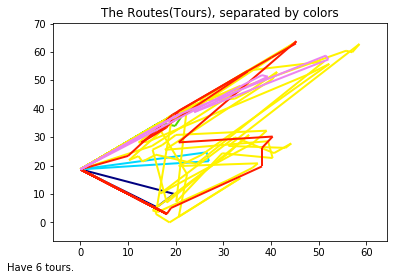

[[6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []], [5, [4], [7, 11]], [4, [45], [86, 88]], [3, [23, 38], [43, 74, 64, 48]], [0, [51, 20, 48, 42, 25, 36, 33, 19, 41, 0, 11, 13, 5, 9, 26, 15, 46, 2, 35, 49, 14, 21, 6, 12, 16, 50, 27, 1, 8, 43, 17, 39, 47, 44, 24, 32, 31], [24, 32, 33, 31, 41, 67, 63, 81, 104, 78, 76, 87, 90, 95, 96, 98, 3, 5, 13, 17, 18, 8, 25, 27, 29, 19, 15, 10, 83, 94, 92, 93, 84, 82, 70, 71, 73, 44, 46, 58, 61, 103, 45, 9, 85, 97, 14, 28, 39, 101, 38, 36, 34, 51, 59, 79, 89, 26, 23, 102, 22, 21, 52, 50, 69, 66, 91, 2, 99, 1, 75, 49, 47, 105]], [1, [30, 28, 52, 22, 3, 29, 7, 10, 34], [20, 42, 57, 55, 65, 62, 40, 54, 53, 56, 60, 30, 16, 12, 100, 106, 6, 4]], [2, [18, 37, 40], [35, 37, 72, 77, 80, 68]]]


In [21]:
start_time = time.time()
generations = 100
fitness = []
for gen in range(generations):
    fitness=[]
    for chromosome in populations:
        fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
    populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
    populations.pop()
    populations.pop()
    ## Elitism
    elite1 = populations.pop(0)
    elite2 = populations.pop(0)
    id1,id2 = random.randrange(0,len(populations)),random.randrange(0,len(populations))
    parent1,parent2 = populations[id1],populations[id2]
    ## Try crossover only elites
    # parent1,parent2 = elite1,elite2
    child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, child1, child2,maxSpot)
    populations.append(child1)
    populations.append(child2)
    populations.append(elite1)
    populations.append(elite2)


fitness=[]
for chromosome in populations:
    fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
print("Crossovers time --- %s seconds ---" % (time.time()-start_time))  

dist = evaluate.chromosomeRoutesDistance(populations[0],DISTANCES)
print('Distances of the best chromosome: '+str(dist))
print (populations[0])
dist = evaluate.chromosomeRoutesDistance(populations[len(populations)-1],DISTANCES)
print('Distances of the worst chromosome: '+str(dist))
print(populations[len(populations)-1])

util.draw_tours(populations[0],DISTANCES)
print(populations[0])

# Try GA with restricted spots!!

In [13]:
start_time = time.time()
population_size = 200
populations = []
for i in range(population_size):
    chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles,maxSpot=10)
    populations.append(chromosome)
print("Populations creation time --- %s seconds ---" % (time.time()-start_time))  
##########################################################################


Populations creation time --- 3.1801815032958984 seconds ---


In [14]:
maxSpot=10
start_time = time.time()
generations = 1000
fitness = []
for gen in range(generations):
    fitness=[]
    for chromosome in populations:
        fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
    populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
    populations.pop()
    populations.pop()
    ## Elitism
    elite1 = populations.pop(0)
    elite2 = populations.pop(0)
    id1,id2 = random.randrange(0,len(populations)),random.randrange(0,len(populations))
    parent1,parent2 = populations[id1],populations[id2]
    ## Try crossover only elites
    # parent1,parent2 = elite1,elite2
    child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, child1, child2,maxSpot)
    populations.append(child1)
    populations.append(child2)
    populations.append(elite1)
    populations.append(elite2)


fitness=[]
for chromosome in populations:
    fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
print("Crossovers time --- %s seconds ---" % (time.time()-start_time))  

dist = evaluate.chromosomeRoutesDistance(populations[0],DISTANCES)
print('Distances of the best chromosome: '+str(dist))
print (populations[0])
dist = evaluate.chromosomeRoutesDistance(populations[len(populations)-1],DISTANCES)
print('Distances of the worst chromosome: '+str(dist))
print(populations[len(populations)-1])

Crossovers time --- 19.142090559005737 seconds ---
Distances of the best chromosome: 1869.06741812
[[6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []], [5, [4], [7, 11]], [4, [45], [86, 88]], [3, [23, 38], [43, 74, 64, 48]], [0, [51, 20, 48, 42, 25, 36, 33, 19, 41, 0, 11, 13, 5, 9, 26, 15, 46, 2, 35, 49, 14, 21, 6, 12, 16, 50, 27, 1, 8, 43, 17, 39, 47, 44, 24, 32, 31], [24, 32, 33, 31, 41, 67, 63, 81, 104, 78, 76, 87, 90, 95, 96, 98, 3, 5, 13, 17, 18, 8, 25, 27, 29, 19, 15, 10, 83, 94, 92, 93, 84, 82, 70, 71, 73, 44, 46, 58, 61, 103, 45, 9, 85, 97, 14, 28, 39, 101, 38, 36, 34, 51, 59, 79, 89, 26, 23, 102, 22, 21, 52, 50, 69, 66, 91, 2, 99, 1, 75, 49, 47, 105]], [1, [30, 28, 52, 22, 3, 29, 7, 10, 34], [20, 42, 57, 55, 65, 62, 40, 54, 53, 56, 60, 30, 16, 12, 100, 106, 6, 4]], [2, [

In [ ]:
maxSpot=10
start_time = time.time()
generations = 100
fitness = []
for gen in range(generations):
    fitness=[]
    for chromosome in populations:
        fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
    populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
    populations.pop()
    populations.pop()
    ## Elitism
    elite1 = populations.pop(0)
    elite2 = populations.pop(0)
    id1,id2 = random.randrange(0,len(populations)),random.randrange(0,len(populations))
    parent1,parent2 = populations[id1],populations[id2]
    ## Try crossover only elites
    # parent1,parent2 = elite1,elite2
    child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, child1, child2,maxSpot)
    populations.append(child1)
    populations.append(child2)
    populations.append(elite1)
    populations.append(elite2)


fitness=[]
for chromosome in populations:
    fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
print("Crossovers time --- %s seconds ---" % (time.time()-start_time))  

dist = evaluate.chromosomeRoutesDistance(populations[0],DISTANCES)
print('Distances of the best chromosome: '+str(dist))
print (populations[0])
dist = evaluate.chromosomeRoutesDistance(populations[len(populations)-1],DISTANCES)
print('Distances of the worst chromosome: '+str(dist))
print(populations[len(populations)-1])

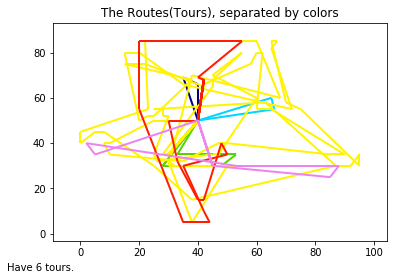

In [15]:
util.draw_tours(populations[0],LOCATIONS)